In [1]:
import cv2
import onnx

import sys
sys.path.append('..')
from models.scnn_pytorch.model import SCNN
from models.erfnet.erfnet import ERFNet
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load model
dummy_input = torch.rand(1, 3, 208, 976)
erf_net = ERFNet(5)
weights = torch.load('D:/Dev/Codes-for-Lane-Detection/ERFNet-CULane-PyTorch/trained/ERFNet_trained.tar')['state_dict']
weights = {k.replace("module.", ""):v for k,v in weights.items()}
erf_net.load_state_dict(weights)
erf_net.eval()

In [3]:
# export model
torch.onnx.export(erf_net, dummy_input, 'erf_net.onnx', export_params=True, opset_version=11, do_constant_folding=True,
                  input_names=['input'], output_names=['seg', 'prob'],)

C:\Users\DHH\miniconda3\envs\ets2\lib\site-packages\torch\nn\functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [4]:
# check exported model
onnx_model = onnx.load("erf_net.onnx")
onnx.checker.check_model(onnx_model, full_check=True)

In [5]:
net = cv2.dnn.readNetFromONNX('erf_net.onnx')

In [6]:
img = cv2.imread("D:/Dev/auto-ets2/crop.png")

In [7]:
blob = cv2.dnn.blobFromImage(img, 1.0, (976, 208))
blob.shape

(1, 3, 208, 976)

In [8]:
net.setInput(blob)
output_names = net.getUnconnectedOutLayersNames()

In [9]:
seg, prob = net.forward(output_names)

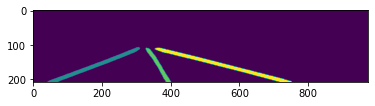

In [10]:
seg_img = np.argmax(seg[0], axis=0).astype(np.uint8)
plt.imshow(seg_img)